# WeatherPy

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key from api_keys.py
import api_keys

# Determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
Use numpy to generate 500 random latitude and longitude points, then use citipy to identify the nearest city for each combination.

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

## Perform API Calls

In [27]:
api_key = api_keys.owm_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_url = url + "&q=" + cities[0]
city_weather = requests.get(city_url).json()
# Check for keys and index we need to use later
city_weather

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'model',
 'main': {'temp': 69.1,
  'pressure': 1012,
  'humidity': 92,
  'temp_min': 69.1,
  'temp_max': 69.1,
  'sea_level': 1012,
  'grnd_level': 1012},
 'wind': {'speed': 29.66, 'deg': 133},
 'rain': {'3h': 9.63},
 'clouds': {'all': 100},
 'dt': 1573507946,
 'sys': {'country': 'PF', 'sunrise': 1573481358, 'sunset': 1573528718},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [35]:
api_key = api_keys.owm_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []

# Create logs
print("Beginning Data Retrieval")
print("------------------------")

record_count = 1
set_count = 1

# Either create dataframe with empty columns and append with iterrow
# Or store into a list of dictionaries 
for i, city in enumerate(cities):
    # Log cities in groups of 50 
    if(i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 0
        
    # URL for query 
    print(f"Processing Record {record_count} of set {set_count} | {city}.")
    record_count += 1
    
    # Request info for each city using city_url
    city_url = url + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()
        
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        temp_max = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        speed = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]
        
        city_data.append({"City": city,
                         "Lat": lat, 
                         "lng": lng,
                         "Max Temp": temp_max,
                         "Humidity": humidity,
                         "Cloudiness": clouds,
                         "Wind Speed": speed,
                          "Country": country,
                          "Date": date})
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | rikitea.
Processing Record 2 of set 1 | ponta do sol.
Processing Record 3 of set 1 | illoqqortoormiut.
City not found. Skipping...
Processing Record 4 of set 1 | clyde river.
Processing Record 5 of set 1 | ivybridge.
Processing Record 6 of set 1 | georgetown.
Processing Record 7 of set 1 | jamestown.
Processing Record 8 of set 1 | albany.
Processing Record 9 of set 1 | hermanus.
Processing Record 10 of set 1 | sidi qasim.
City not found. Skipping...
Processing Record 11 of set 1 | deputatskiy.
Processing Record 12 of set 1 | cape town.
Processing Record 13 of set 1 | castro.
Processing Record 14 of set 1 | khatanga.
Processing Record 15 of set 1 | chuy.
Processing Record 16 of set 1 | kapaa.
Processing Record 17 of set 1 | ushuaia.
Processing Record 18 of set 1 | kiunga.
Processing Record 19 of set 1 | hilo.
Processing Record 20 of set 1 | east london.
Processing Record 21 of set 1 | severo-kurilsk.
Proces

Processing Record 27 of set 4 | pong.
Processing Record 28 of set 4 | jijiga.
Processing Record 29 of set 4 | tabou.
Processing Record 30 of set 4 | shenjiamen.
Processing Record 31 of set 4 | ituni.
City not found. Skipping...
Processing Record 32 of set 4 | naze.
Processing Record 33 of set 4 | avarua.
Processing Record 34 of set 4 | concordia.
Processing Record 35 of set 4 | safaga.
City not found. Skipping...
Processing Record 36 of set 4 | tadine.
Processing Record 37 of set 4 | at-bashi.
Processing Record 38 of set 4 | jalu.
Processing Record 39 of set 4 | yerbogachen.
Processing Record 40 of set 4 | kazerun.
Processing Record 41 of set 4 | ampanihy.
Processing Record 42 of set 4 | laguna.
Processing Record 43 of set 4 | katsuura.
Processing Record 44 of set 4 | tyup.
Processing Record 45 of set 4 | bambanglipuro.
Processing Record 46 of set 4 | mount gambier.
Processing Record 47 of set 4 | guerrero negro.
Processing Record 48 of set 4 | alice springs.
Processing Record 49 of se

City not found. Skipping...
Processing Record 8 of set 8 | vostok.
Processing Record 9 of set 8 | nikolayevka.
Processing Record 10 of set 8 | el retorno.
Processing Record 11 of set 8 | maryville.
Processing Record 12 of set 8 | barcelona.
Processing Record 13 of set 8 | adrar.
Processing Record 14 of set 8 | hobyo.
Processing Record 15 of set 8 | galle.
Processing Record 16 of set 8 | awjilah.
Processing Record 17 of set 8 | nsanje.
Processing Record 18 of set 8 | sitka.
Processing Record 19 of set 8 | salalah.
Processing Record 20 of set 8 | pundaguitan.
Processing Record 21 of set 8 | port-cartier.
Processing Record 22 of set 8 | fort saint john.
City not found. Skipping...
Processing Record 23 of set 8 | rawson.
Processing Record 24 of set 8 | port-gentil.
Processing Record 25 of set 8 | boryslav.
Processing Record 26 of set 8 | sistranda.
Processing Record 27 of set 8 | port lincoln.
Processing Record 28 of set 8 | olafsvik.
City not found. Skipping...
Processing Record 29 of set

Processing Record 38 of set 11 | saint-augustin.
Processing Record 39 of set 11 | piltene.
Processing Record 40 of set 11 | ondjiva.
Processing Record 41 of set 11 | qarqin.
Processing Record 42 of set 11 | bela.
Processing Record 43 of set 11 | acala.
Processing Record 44 of set 11 | joura.
Processing Record 45 of set 11 | machaneng.
Processing Record 46 of set 11 | pacific grove.
Processing Record 47 of set 11 | ciudad bolivar.
Processing Record 48 of set 11 | inuvik.
Processing Record 49 of set 11 | pangai.
Processing Record 0 of set 12 | nelson bay.
Processing Record 1 of set 12 | jizan.
Processing Record 2 of set 12 | abha.
Processing Record 3 of set 12 | kosa.
Processing Record 4 of set 12 | goure.
Processing Record 5 of set 12 | pozhva.
Processing Record 6 of set 12 | harer.
Processing Record 7 of set 12 | moose factory.
Processing Record 8 of set 12 | mae sot.
Processing Record 9 of set 12 | harbin.
Processing Record 10 of set 12 | nuuk.
Processing Record 11 of set 12 | miraflo

In [36]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file, encoding="utf-8")
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,69.10,92,100,29.66,PF,1573511011
1,ponta do sol,-20.63,-46.00,72.37,77,84,11.18,BR,1573511012
2,clyde river,70.47,-68.59,14.00,92,90,29.97,CA,1573511012
3,ivybridge,50.39,-3.92,44.01,87,20,6.93,GB,1573511012
4,georgetown,6.80,-58.16,84.20,79,75,6.93,GY,1573510889


# Plots

In [41]:
# Takes in two columns and returns a scatterplot
def dfScatter(x, y):
    plot = plt.scatter(city_data_df[x], city_data_df[y],
                      edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    return plot

## Latitude vs Temperature

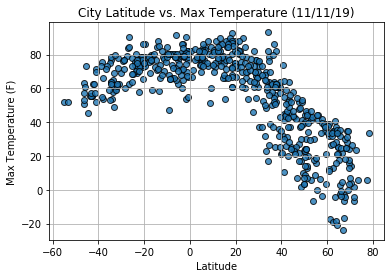

In [57]:
dfScatter("Lat", "Max Temp")

# Title and Labels, include date of data retrieval
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs Humidity

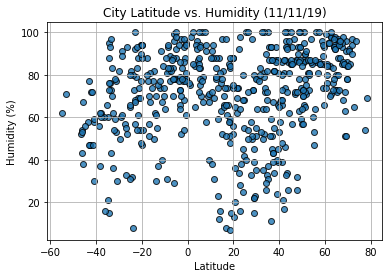

In [51]:
dfScatter("Lat", "Humidity")

plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness 

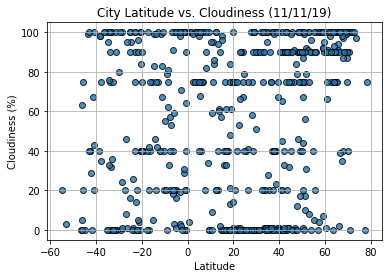

In [58]:
dfScatter("Lat", "Cloudiness")

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed

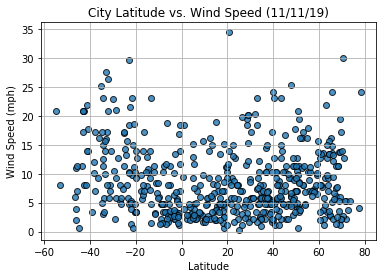

In [56]:
dfScatter("Lat", "Wind Speed")

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("output_data/Fig4.png")

plt.show()